In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
x_axis = np.linspace(-3,3)
y_axis = x_axis ** 2

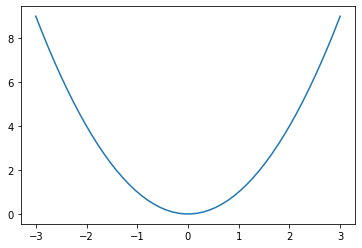

In [6]:
plt.plot(x_axis,y_axis)

In [8]:
df = pd.read_csv('qog_std_cs_jan18.csv')

In [9]:
df.shape

(194, 1882)

(array([ 5., 12., 21., 15., 14., 18., 31., 27., 19., 24.]),
 array([0.347     , 0.4071    , 0.4672    , 0.5273    , 0.5874    ,
        0.6475    , 0.70760001, 0.76770001, 0.82780001, 0.88790001,
        0.94800001]),
 <a list of 10 Patch objects>)

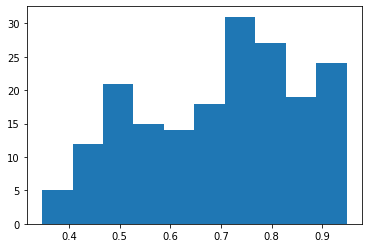

In [11]:
plt.hist(df['undp_hdi'].dropna())

In [13]:
df[df['undp_hdi'].isna()]['cname'] # primero pregunto si es NA, luego obtengo los nombres de estos

37               Taiwan
89         Korea, North
111              Monaco
119               Nauru
129    Marshall Islands
148          San Marino
159             Somalia
179              Tuvalu
Name: cname, dtype: object

In [14]:
df.shape

(194, 1882)

In [15]:
df.dropna().shape

(0, 1882)

In [16]:
hdi_dropna = df['undp_hdi'].dropna()

Text(0, 0.5, 'Frecuencia')

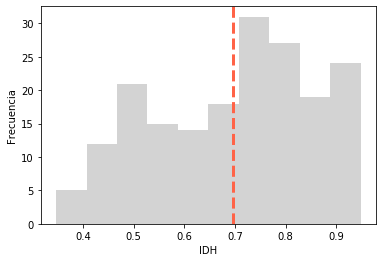

In [21]:
plt.hist(hdi_dropna, color='lightgrey')
plt.axvline(hdi_dropna.mean(), lw=3, color='tomato', linestyle='--')
plt.xlabel('IDH')
plt.ylabel('Frecuencia')

In [22]:
hdi_group = df.loc[:,['cname','ccode','undp_hdi','ht_region']]

In [24]:
hdi_group['region_recod'] = hdi_group['ht_region'].replace(
    [1,2,3,4,5,6,7,8,9,10],
    ['EastEurope','LatAm','NorthAfrica','SubSaharian','WesternDom','EastAsia','SouthEastAsia','SouthAsia','Pacific','Caribean']
)

In [25]:
for i in hdi_group['region_recod'].unique():
    print(i, hdi_group[hdi_group['region_recod'] == i]['undp_hdi'].mean())

SouthAsia 0.6051249925
EastEurope 0.7806785735714287
NorthAfrica 0.7483000004999999
WesternDom 0.9023600028000002
SubSaharian 0.5088125012500001
Caribean 0.7411538446153847
LatAm 0.7215000034999999
Pacific 0.6430000066666666
SouthEastAsia 0.6955454572727272
EastAsia 0.8170000024999999


In [27]:
hdi_groupby_means = hdi_group.groupby('region_recod')['undp_hdi'].mean()

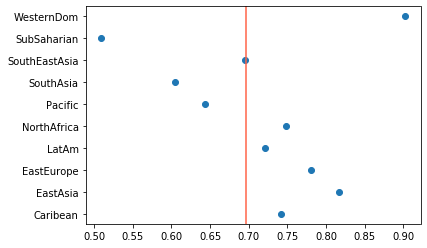

In [29]:
plt.plot(hdi_groupby_means.values, hdi_groupby_means.index, 'o')
plt.axvline(hdi_group['undp_hdi'].mean(),color='tomato')

In [30]:
mu = hdi_dropna.mean()
sigma = hdi_dropna.var()